In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [3]:
data  = pd.read_csv('Amazon - Movies and TV Ratings.csv')
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Shape of the dataset:',data.shape)

Shape of the dataset: (4848, 207)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [6]:
data = data.drop('user_id',axis=1)

# Exploratory Data Analysis:

   - Which movies have maximum views/ratings?

   - What is the average rating for each movie? Define the top 5 movies with the maximum ratings.

   - Define the top 5 movies with the least audience.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


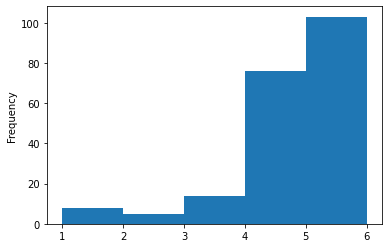

In [8]:
data.describe().T['mean'].plot(kind='hist',bins=[1,2,3,4,5,6])
plt.show()

### Which movies have maximum views/ratings?

In [9]:
data_desc = pd.DataFrame(data.describe().T)
data_desc['count'].sort_values(ascending=False).head(10).to_frame()

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0
Movie91,128.0
Movie92,101.0
Movie89,83.0
Movie158,66.0
Movie108,54.0


### What is the average rating for each movie? Define the top 5 movies with the maximum ratings.

In [10]:
data_desc['mean'].sort_values(ascending=False).head(5).to_frame()

,mean
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


### Define the top 5 movies with the least audience.

In [11]:
data_desc['min'].sort_values(ascending=True).head(5).to_frame()

,min
Movie103,1.0
Movie144,1.0
Movie158,1.0
Movie140,1.0
Movie138,1.0


# Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

   - Divide the data into training and test data

   - Build a recommendation model on training data

   - Make predictions on the test data

In [12]:
data.fillna(0,inplace=True)

In [13]:
data.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Divide the data into training and test data

In [14]:
xtrain,xtest = train_test_split(data,test_size=0.2,random_state=41)
print(xtrain.shape,xtest.shape)

(3878, 206) (970, 206)


### Build a recommendation model on training data

In [15]:
def similar_users(user_id,matrix,k=5):
    
    # Create a data of just the current users
    user = matrix[matrix.index == user_id]
    
    # and data of all other users
    other_users = matrix[matrix.index != user_id]
    
    # Calculate cosine similarity between users and other users
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # Create list of indices of these users
    indices = other_users.index.tolist()
    
    # Create key/value pairs of users index and their simolarities
    index_similarities = dict(zip(indices,similarities))
    
    # Sort by similarities
    index_similarities_sorted = sorted(index_similarities.items(),key=operator.itemgetter(1))
    index_similarities_sorted.reverse()
    
    # Grab k userd of the top
    top_users_similarities = index_similarities_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users

In [16]:
ID = 1517
similar_users_indices = similar_users(ID,data,10)
similar_users_indices

[1520, 1519, 1518, 1516, 1515, 1514, 1513, 4847, 4846, 4845]

### Make predictions on the test data

In [17]:
def recommend_item(user_index,similar_uers_indices,matrix,items=12):
    
    # Load vector for similar users
    similar_users = matrix[matrix.index.isin(similar_uers_indices)]
    
    # Calculate average rating across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    
    # Convert to dataframe so its easy to sort and filter
    similar_user_data = pd.DataFrame(similar_users,columns=['mean'])
    
    # Load vector for the current users
    user_data = matrix[matrix.index == user_index]
    
    # Transfer it so its easier to filter
    user_data_transpose = user_data.transpose()
    
    # Remae the column name at rating
    user_data_transpose.rename(columns={user_index:'rating'},inplace=True)
    
    # Remove any row without 0 value. Movies not saw yet
    user_data_transpose = user_data_transpose[user_data_transpose['rating'] == 0]
    
    # Generate a list of books the user has not read
    movie_unseen = user_data_transpose.index.tolist()
    
    # Filter average rating of similar users for only books and the current users not read
    similar_users_data_filter = similar_user_data[similar_user_data.index.isin(movie_unseen)]
    
    # Order the dataframe
    similar_users_data_order = similar_user_data.sort_values(by='mean',ascending=False)
    
    # Grab the to n movies
    top_n_movies = similar_users_data_order.head(items)
    top_n_movies_indices = top_n_movies.index.tolist()
    
    # Lookup this Movies in the other dataframe to find names
    print('Top 12 recommended movies for users_id {} are'.format(ID))
    
    return top_n_movies_indices

In [18]:
recommend_item(ID,similar_users_indices,xtrain)

Top 12 recommended movies for users_id 1517 are


['Movie119',
 'Movie206',
 'Movie130',
 'Movie132',
 'Movie133',
 'Movie134',
 'Movie135',
 'Movie136',
 'Movie137',
 'Movie138',
 'Movie139',
 'Movie140']